## Classification tutorial in python - Decision Trees 

This project was done from the guided project course from Coursera ([Link](https://www.coursera.org/learn/classification-trees-in-python/)).

### 1. Import libraries & data

In [95]:
#################################################
# Import key libraries
#################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.2)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [62]:
#################################################
# Read the data
#################################################

cl_data = pd.read_csv('data/cleaveland_data.csv', header=None)
cl_data.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
cl_data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [63]:
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
thalach    303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
ca         303 non-null object
thal       303 non-null object
hd         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


### 2. Clean the data - replace missing values

The data columns have the following meaning and format - 

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina,
  - 2 = atypical angina,
  - 3 = non-anginal pain,
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)
  
This means we have to convert the following columns to categorical variables -
- sex
- cp
- fbs
- restecg
- exang
- slope
- thal

and the following to float - 
- ca

In [64]:
#################################################
# convert each of the relevant columns to categorial variable
#################################################

for col in ['sex','cp','fbs','restecg','exang','slope','thal']:
    cl_data[col] = cl_data[col].astype(str)

cl_data['ca'] = pd.to_numeric(cl_data['ca'], errors='coerce')
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null object
cp         303 non-null object
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null object
restecg    303 non-null object
thalach    303 non-null float64
exang      303 non-null object
oldpeak    303 non-null float64
slope      303 non-null object
ca         299 non-null float64
thal       303 non-null object
hd         303 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 33.2+ KB


In [83]:
#################################################
# find how many missing values in each column of the data
#################################################
for col in cl_data.columns:
    print('***************************************')
    print('Column - ', col)
    print('Missing values -', cl_data[col].isnull().sum())
    print('Unique values - ', cl_data[col].unique())

***************************************
Column -  age
Missing values - 0
Unique values -  [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
***************************************
Column -  sex
Missing values - 0
Unique values -  ['1.0' '0.0']
***************************************
Column -  cp
Missing values - 0
Unique values -  ['1.0' '4.0' '3.0' '2.0']
***************************************
Column -  restbp
Missing values - 0
Unique values -  [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
***************************************
Column -  chol
Missing values - 0
Unique values -  [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 23

Ideally when we have incorrect data like '?', or missing data like nan, we would want to impute them with some other relevant values (mean/median etc.). However in our case the two columns which have missing values are ca and thal.

These columns missing values cannot be replaced with mean/median values as they have very specific meaning.

We will simply remove the observations where we have these missing values if they are very few.

In [84]:
#################################################
# treating missing values
#################################################

obs = len(cl_data)
obs_miss = len(cl_data[(cl_data['ca'].isnull())|(cl_data['thal']=='?')])
print('Number of total observation in data :', obs)
print('Number of observation with missing values :', obs_miss, '(', np.round(100*obs_miss/obs,2), '%)')

Number of total observation in data : 303
Number of observation with missing values : 6 ( 1.98 %)


Since the missing data is only ~2% of total data we can remove them.

In [85]:
cl_data = cl_data[(cl_data['ca'].notnull())&(cl_data['thal']!='?')]
print(len(cl_data))

297


### 3. Train a Decision Tree model & check various metrics

In [96]:
#################################################
# split the data into train and test after separating out X and Y
#################################################

x = cl_data.drop('hd', axis=1).copy()
y = cl_data['hd'].copy()

# one hot encoding for character variables
x_dummy = pd.get_dummies(x)
x_dummy.head()

# convert y from multi class to two class variable
y[y > 0] = 1
print('proportion of 1 in y :', np.round(100*y.sum()/len(y),1), '%')

# split the x and y variables
x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, train_size=0.8, random_state=42)
print('Obs in x :', len(x_dummy), ', Obs in x train : ',len(x_train), ', Obs in x test :', len(x_test))

proportion of 1 in y : 46.1 %
Obs in x : 297 , Obs in x train :  237 , Obs in x test : 60


********************************************************
Precision : 0.75
Recall : 0.88
Accuracy : 0.83
F-score : 0.81
********************************************************


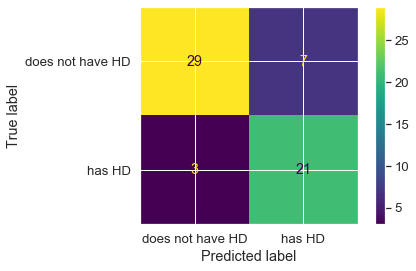

In [97]:
#################################################
# train the model on training data and plot confusion matrix on test data
#################################################

dt_model = DecisionTreeClassifier(random_state=42)
dt_model = dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]
print('********************************************************')
print('Precision :', np.round(tp/(tp+fp),2))
print('Recall :', np.round(tp/(tp+fn),2))
print('Accuracy :', np.round((tp+tn)/(tp+tn+fp+fn),2))
print('F-score :', np.round(f1_score(y_test, y_pred),2))
print('********************************************************')
plot_confusion_matrix(dt_model, x_test, y_test, display_labels=['does not have HD', 'has HD'])

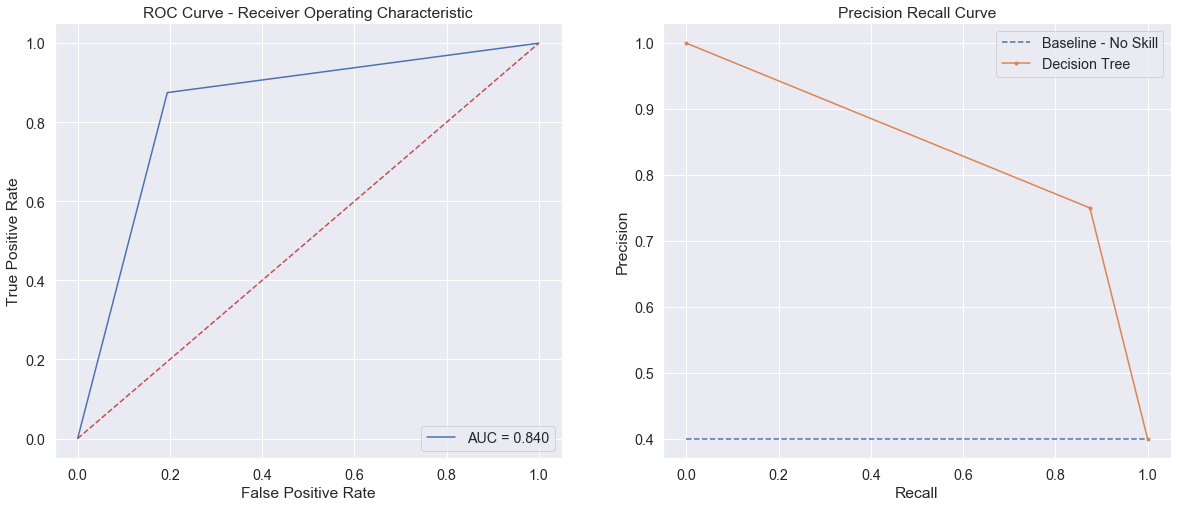

In [98]:
#################################################
# Plot the ROC curve and Precision Recall curve for the model
#################################################

# y prediction probablilities
y_pred_prob = dt_model.predict_proba(x_test)

# FPR and TPR values for various thresholds
fpr, tpr, thold1 = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Precision Recall values for various thresholds
precision, recall, thold2 = precision_recall_curve(y_test, y_pred_prob[:,1])
no_skill = len(y_test[y_test==1])/len(y_test)

sns.set(style='darkgrid', font_scale=1.3)
fig, ax = plt.subplots(1,2,figsize=(20,8))

# Plot 1 : ROC Curve
ax[0].set_title('ROC Curve - Receiver Operating Characteristic')
ax[0].plot(fpr,tpr, 'b', label='AUC = %0.3f' %roc_auc)
ax[0].legend(loc='lower right')
ax[0].plot([0,1], [0,1], 'r--')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')

#Plot 2 : Precision Recall curve
ax[1].set_title('Precision Recall Curve')
ax[1].plot([0,1], [no_skill, no_skill], linestyle='--', label='Baseline - No Skill')
ax[1].plot(recall, precision, marker='.', label='Decision Tree')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].legend()

plt.show()

### 4. Tune the Decision tree parameter by pruning

Alpha values : [0.         0.00276606 0.00361664 0.00383583 0.00389484 0.00401751
 0.00543835 0.00562588 0.00562588 0.00562588 0.0060654  0.00632911
 0.00664518 0.00766526 0.00813743 0.00889252 0.00972473 0.01084991
 0.01140093 0.01350211 0.01487036 0.01593999 0.02109705 0.03586498
 0.0401355 ]
**************************************************


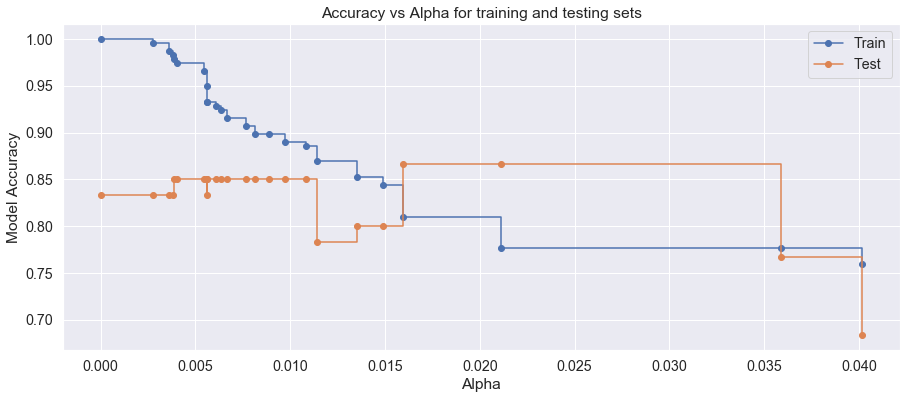

In [99]:
#################################################
# Pruning the decision tree - Cost complexity algo using test data
#################################################

# get the all possible values of alpha for complexity
path = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]
print('Alpha values :', ccp_alphas)
print('**************************************************')

# train different models for different alphas
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(x_train, y_train)
    train_scores.append(dt.score(x_train, y_train))
    test_scores.append(dt.score(x_test, y_test))
    
# plot all the models accuracy scores vs alphas
sns.set(style='darkgrid', font_scale=1.3)

fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel("Alpha")
ax.set_ylabel("Model Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
ax.legend()
plt.show()

Based on above plot of accuracies and alphas we can pick the **alpha value of 0.01084991** as after that training accuracy decreases.

********************************************************
Precision : 0.83
Recall : 0.79
Accuracy : 0.85
F-score : 0.81
********************************************************


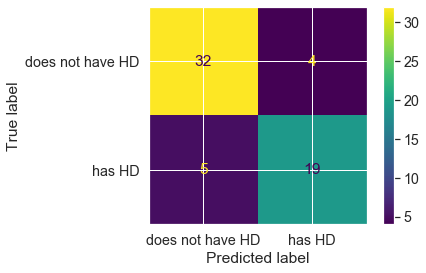

In [100]:
dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01084991)
dt_model = dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]
print('********************************************************')
print('Precision :', np.round(tp/(tp+fp),2))
print('Recall :', np.round(tp/(tp+fn),2))
print('Accuracy :', np.round((tp+tn)/(tp+tn+fp+fn),2))
print('F-score :', np.round(f1_score(y_test, y_pred),2))
print('********************************************************')
plot_confusion_matrix(dt_model, x_test, y_test, display_labels=['does not have HD', 'has HD'])

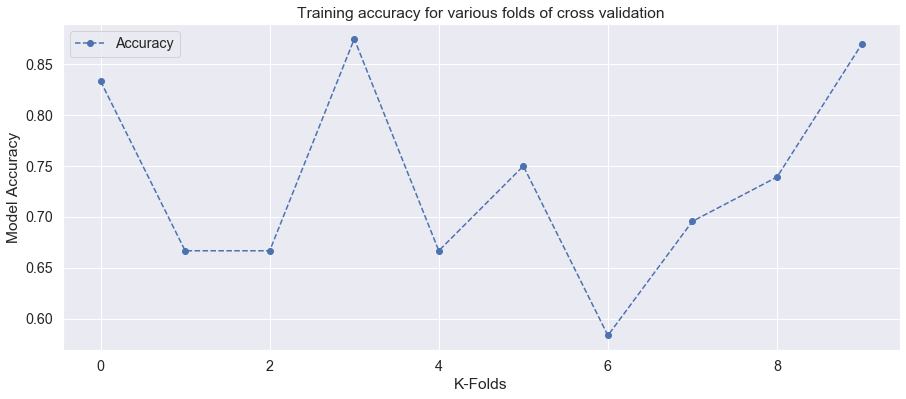

In [126]:
#################################################
# Pruning the decision tree - Cost complexity algo using cross validation
#################################################

# Plot of accuracy on training datset using various folds of cross validation
dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01084991)
scores = cross_val_score(dt_model, x_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

sns.set(style='darkgrid', font_scale=1.3)
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(df['tree'], df['accuracy'], marker='o', linestyle='--', label='Accuracy')
ax.set_title('Training accuracy for various folds of cross validation')
ax.set_xlabel('K-Folds')
ax.set_ylabel('Model Accuracy')
plt.legend()

Text(0.5, 1.0, 'Plot of Training accuracy vs Alpha')

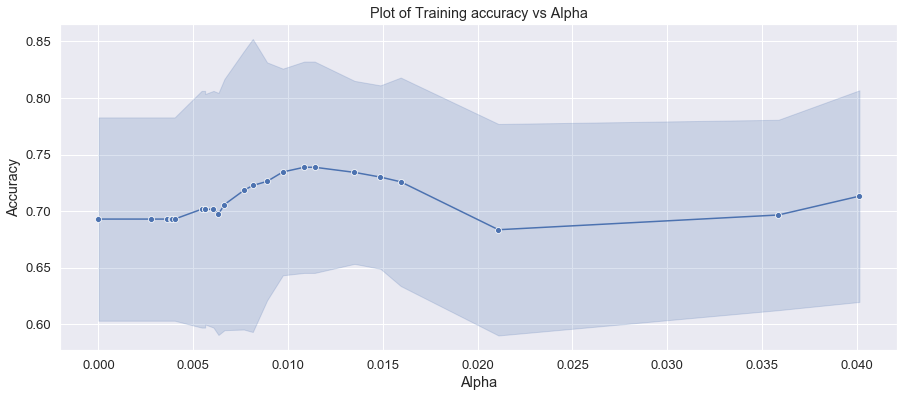

In [127]:
# Finding the relevant value of alpha for different cross validation
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt, x_train, y_train, cv=10)
    for s in scores:
        alpha_loop_values.append([ccp_alpha, s])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'accuracy'])

# Plot of accuracy on training datset using various folds of cross validation
sns.set(style='darkgrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.lineplot(data = alpha_results, x='alpha', y='accuracy', ci='sd', marker='o', linestyle='--')
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Plot of Training accuracy vs Alpha')

Even from the above chart it looks like that the peak accuracy occurs at the value of **alpha = 0.01084991**

We already trained and plotted the model for this value of alpha, so we will not do that again. We will only plot the ROC curve and Precision Recall curve again.

In next section we will plot the decision tree for this alpha and try to interpret it.

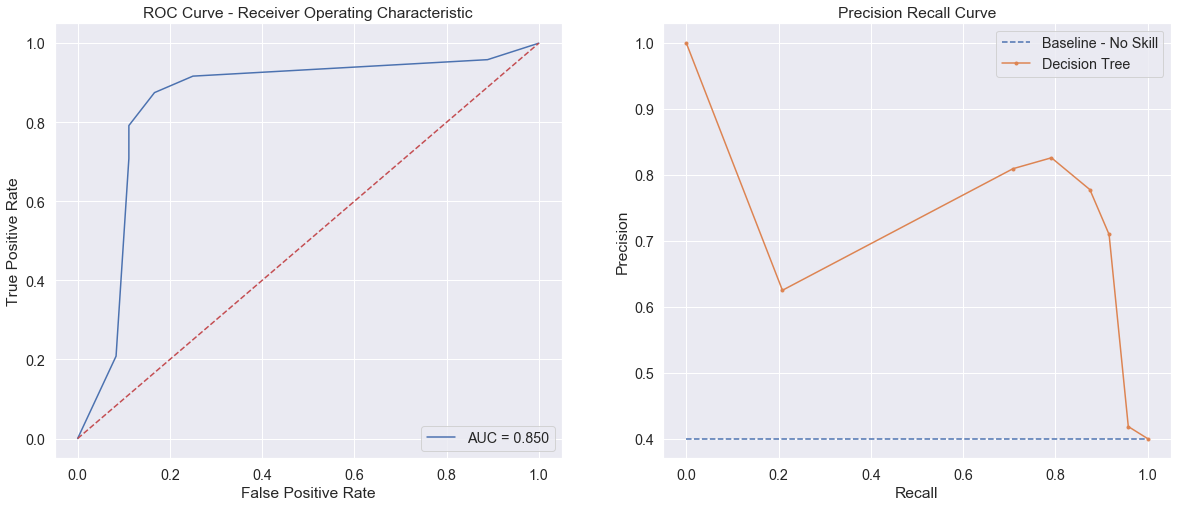

In [131]:
#################################################
# Plot the ROC curve and Precision Recall curve for the model
#################################################

dt_model_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01084991)
dt_model_pruned = dt_model.fit(x_train, y_train)

# y prediction probablilities
y_pred_prob = dt_model.predict_proba(x_test)

# FPR and TPR values for various thresholds
fpr, tpr, thold1 = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Precision Recall values for various thresholds
precision, recall, thold2 = precision_recall_curve(y_test, y_pred_prob[:,1])
no_skill = len(y_test[y_test==1])/len(y_test)

sns.set(style='darkgrid', font_scale=1.3)
fig, ax = plt.subplots(1,2,figsize=(20,8))

# Plot 1 : ROC Curve
ax[0].set_title('ROC Curve - Receiver Operating Characteristic')
ax[0].plot(fpr,tpr, 'b', label='AUC = %0.3f' %roc_auc)
ax[0].legend(loc='lower right')
ax[0].plot([0,1], [0,1], 'r--')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')

#Plot 2 : Precision Recall curve
ax[1].set_title('Precision Recall Curve')
ax[1].plot([0,1], [no_skill, no_skill], linestyle='--', label='Baseline - No Skill')
ax[1].plot(recall, precision, marker='.', label='Decision Tree')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].legend()

plt.show()

### 5. Plot the decision Tree and see interpretation

[Text(482.8846153846154, 747.4499999999999, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = No HD'),
 Text(257.53846153846155, 611.55, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = No HD'),
 Text(128.76923076923077, 475.65, 'oldpeak <= 2.7\ngini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = No HD'),
 Text(64.38461538461539, 339.74999999999994, 'gini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = No HD'),
 Text(193.15384615384616, 339.74999999999994, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = HD'),
 Text(386.3076923076923, 475.65, 'cp_4.0 <= 0.5\ngini = 0.495\nsamples = 40\nvalue = [18, 22]\nclass = HD'),
 Text(321.9230769230769, 339.74999999999994, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(450.69230769230774, 339.74999999999994, 'oldpeak <= 0.45\ngini = 0.32\nsamples = 20\nvalue = [4, 16]\nclass = HD'),
 Text(386.3076923076923, 203.8499999999999, 'age <= 42.0\ngini = 0.49\nsamples = 7\nvalue = [4, 

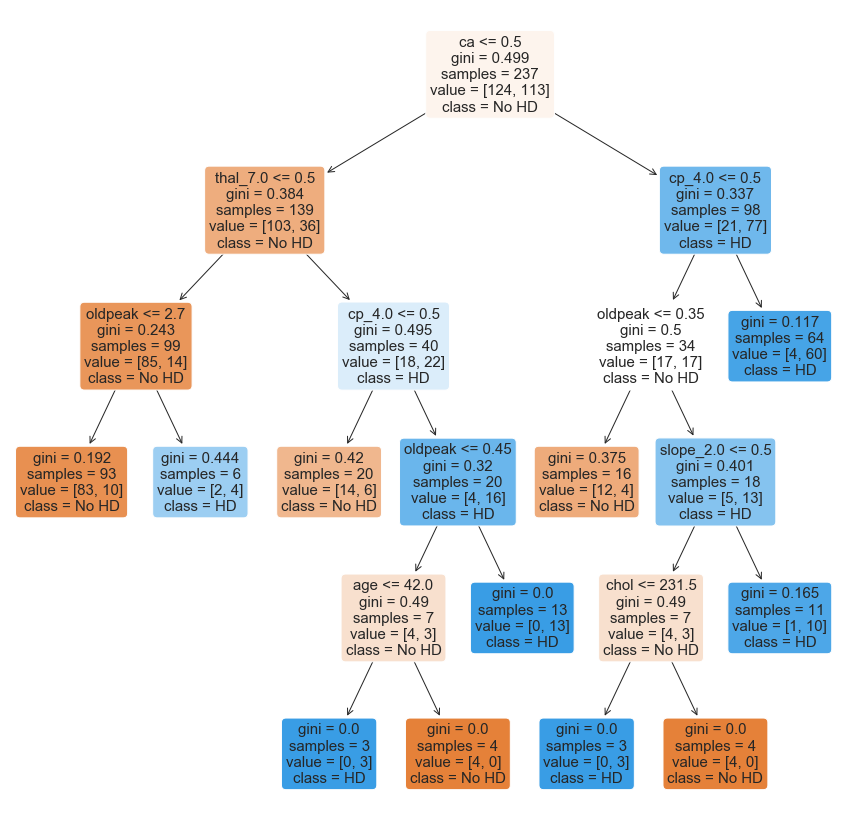

In [132]:
#################################################
# Plotting the decision tree
#################################################

sns.set(style='darkgrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(15,15))

plot_tree(dt_model_pruned, filled=True, rounded=True, class_names=['No HD', 'HD'], feature_names=x_dummy.columns)

Interpretation - 
In each node, we have:
- The variable (column name) and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split the observations. All
observations with **ca <= 0.5** go to the **left** and all observations with **ca > 0.5** go to the **right**.
- **gini** is the gini index or score for that node
- **samples** tell us how many samples are in that node
- **value** tells us how many samples in the node are in each category. In this example, we have two categories, **No** and **Yes**, referring to whether or not a patient has heart disease. The number of patients with **No** comes first because the categories are in alphabetical order. Thus, in the root, 118 patients have **No** and 104 patients have **Yes**.
- **class** tells us whichever category is represented most in the node. In the root, since 118 people have **No** and only 104 people have **Yes**, class is set to **No**.

The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.

The nodes and leaves are colored by the **class**. In this case **No** is different shades of orange-ish and **Yes** is different shades of blue. The the darker the shade, the lower the **gini** score, and that tells us how much the node or leaf is skewed towards one class.